In [203]:
from graphviz import Digraph
import math

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw(root):
    dot = Digraph(format= 'svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{%s | data %.4f | %s}" % (n.label, n.data, n.grad), shape = 'record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot



In [204]:
class Value:
    #_child is an important variable, underscore because it does not change under any operation
    #__variable meaning it is protected like password and it can not be accessed
    def __init__(self, data, _children = (), _op = '', label =''):
           self.data = data
           self.grad = 0
           self._op = _op
           self._prev = set(_children)
           self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value((self.data + other.data), (self, other), '+')
    
    def __mul__(self, other):
        return Value((self.data * other.data), (self, other), '*')
    
    #sigmoid function is too sensative for the activation function
    def sigmoid(self):
         x = self.data
         val = 1.0 / (1 + math.exp(-x))
         out = Value(val, (self,), 'Sigma')
         return out
    def tanh(self):
       t = math.exp(2 * (self.data))
       out = Value((t-1) / (t+1), (self,), 'Tanh')
       return out
        

In [205]:
a = Value(2, label= 'x1')
b = Value(-1, label= 'w1')
c = Value(3, label='x2')
d = Value(0.6, label='w2')
e = a * b; e.label = 'x1w1'
f = c * d; f.label = 'x2w2'
g = e + f; g.label = 'x1w1+x2w2'
h = Value(1, label='b')
i = g + h; i.label = 'x1w1+x2w2+b'
L = i.sigmoid(); L.label = 'L'

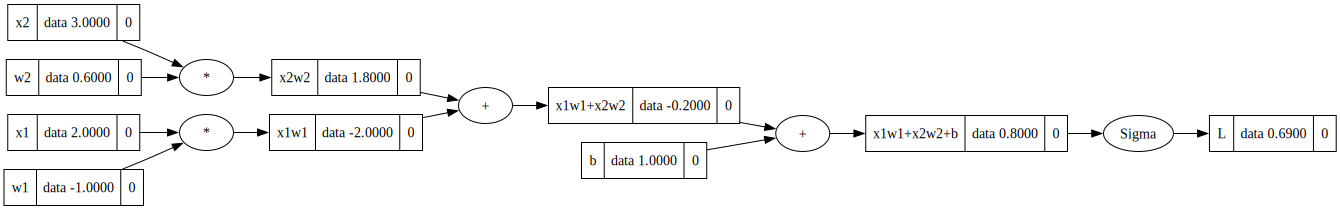

In [206]:
draw(L)